## Homework 1: Extra Credit: Building regularized models for Boston data set


## Problem Description
Perform a bias variance analysis of the Boston housing data set with the thirteen predictors. 
* Use sklearn's built-in functions to split the data into training, validation and test sets. 
* What is the lowest achievable error on the test set with $λ=0$ ? 
* Select the best value for  $λ$ and report the test set error with the best  $λ$ . 
* Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. 
* What is the test set error with quadratic features with the best  $λ$  chosen with the validation set? 
* What is the test set error with cubic features with the best  $λ$  chosen with the validation set? 

Put your analysis code in a separate Python script or notebook called bostonexpt.py or bostonexpt.ipynb. Present your results analytically with plots to support your findings. Discuss the impact of regularization for building good models for the Boston housing data set.

## Read Data

In [10]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import utils
from reg_linear_regressor_multi import RegularizedLinearReg_SquaredLoss

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

print 'Reading data ...'
bdata = load_boston()
df = pd.DataFrame(data = bdata.data, columns = bdata.feature_names)
df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Reading data ...


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


## Split the data into training, validation and test sets


In [11]:
X = df.values
y = bdata.target

# need to scale the features (use zero mean scaling)
X_norm,mu,sigma = utils.feature_normalize(X)

from sklearn.cross_validation import train_test_split

X_1, X_train, y_1, y_train = train_test_split(X_norm, y, test_size=0.5, random_state=5)
X_test, X_val, y_test, y_val = train_test_split(X_1, y_1, test_size=0.5, random_state=5)

## Find lowest achievable error on the test set with  $\lambda =0$


In [12]:
import numpy as np

# append a column of ones to matrix X
XX_train = np.vstack([np.ones((X_train.shape[0],)),X_train.T]).T
XX_test = np.vstack([np.ones((X_test.shape[0],)),X_test.T]).T

#  Train linear regression with lambda = 0
reg = 0

reglinear_reg1 = RegularizedLinearReg_SquaredLoss()
theta_opt0 = reglinear_reg1.train(XX_train,y_train,reg,num_iters=1000)
print 'Theta at lambda = 0 is ', theta_opt0

loss = reglinear_reg1.loss(theta_opt0, XX_test, y_test, 0)
print '\nLoss is: ', loss

Optimization terminated successfully.
         Current function value: 10.520433
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Theta at lambda = 0 is  [ 22.40166405  -0.70198942   1.42017908   0.67334419   1.07754618
  -2.60455485   2.02860759   0.81661179  -3.43591545   2.50489361
  -1.99690254  -1.93637433   0.54492542  -5.01913978]

Loss is:  12.3122226194


## Select the best value for  $\lambda$ and report the test set error with the best  $\lambda$  

Optimization terminated successfully.
         Current function value: 10.520433
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 10.520566
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 10.520830
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 10.521757
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 10.524403
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 10.533647
         Iterations: 26
         Function evaluations:

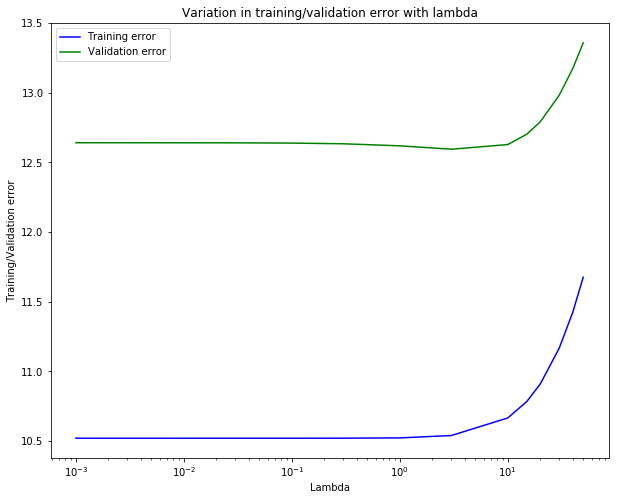

In [13]:
import plot_utils
# append a column of ones to matrix X
XX_train = np.vstack([np.ones((X_train.shape[0],)),X_train.T]).T
XX_test = np.vstack([np.ones((X_test.shape[0],)),X_test.T]).T
XX_val = np.vstack([np.ones((X_val.shape[0],)),X_val.T]).T

# now implement the validation_curve function in utils.py
# this function helps in determining the best lambda using a
# a validation set
# The code will now run your function and plot the figure 

reg_vec, error_train, error_val = utils.validation_curve(XX_train,y_train,XX_val,y_val)
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.show()


## Learning curves for polynomial regression: cubic features.

### Transform data into poly

In [14]:
from utils import feature_normalize
import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize
# We will consider a 3th order polynomial fit for the data

p = 3
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
N = len(X_train); D = X_train.size/N
X_poly = poly.fit_transform(np.reshape(X_train,(N,D)))
X_poly, mu, sigma = utils.feature_normalize(X_poly)

# add a column of ones to X_poly

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# map Xtest and Xval into the same polynomial features

N = len(X_test); D = X_test.size/N
X_poly_test = poly.fit_transform(np.reshape(X_test,(N,D)))

N = len(X_val); D = X_val.size/N
X_poly_val = poly.fit_transform(np.reshape(X_val,(N,D)))

# normalize these two sets with the same mu and sigma

X_poly_test = (X_poly_test - mu) / sigma
X_poly_val = (X_poly_val - mu) / sigma

# add a column of ones to both X_poly_test and X_poly_val
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T


### Choose $\lambda$ using validation set


Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 960
         Function evaluations: 967
         Gradient evaluations: 967
         Current function value: 0.007328
         Iterations: 1000
         Function evaluations: 1007
         Gradient evaluations: 1007
Optimization terminated successfully.
         Current function value: 0.018493
         Iterations: 916
         Function evaluations: 923
         Gradient evaluations: 923
Optimization terminated successfully.
         Current function value: 0.044593
         Iterations: 680
         Function evaluations: 687
         Gradient evaluations: 687
Optimization terminated successfully.
         Current function value: 0.089573
         Iterations: 495
         Function evaluations: 502
         Gradient evaluations: 502
Optimization terminated successfully.
         Current function value: 0.179412
         Iterations: 335
         Function evaluations: 342
         Gradient ev

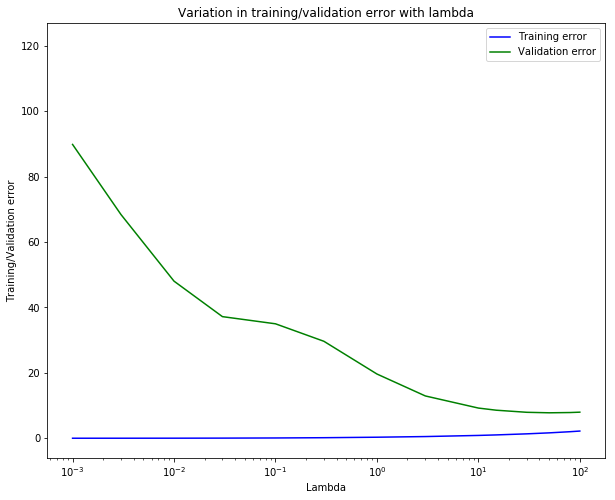

In [16]:
# now implement the validation_curve function in utils.py
# this function helps in determining the best lambda using a
# a validation set
# The code will now run your function and plot the figure 

reg_vec, error_train, error_val = utils.validation_curve(XX_poly,y_train,XX_poly_val,y_val)
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.show()

### Test set error with cubic features with the best  $\lambda$  chosen with the validation set


In [17]:
# TODO: your code for computing test error on the best model (model with the best lambda)
reg_opt = 10

reglinear_reg3 = RegularizedLinearReg_SquaredLoss()
theta_opt3 = reglinear_reg3.train(XX_poly,y_train,reg=reg_opt,num_iters=10000)
error_test = reglinear_reg3.loss(theta_opt3, XX_poly_test, y_test, reg_opt)
print 'The test error is:', error_test

Optimization terminated successfully.
         Current function value: 1.495007
         Iterations: 66
         Function evaluations: 73
         Gradient evaluations: 73
The test error is: 7.09036691533


## Learning curves for polynomial regression: quadratic features.

### Transform data into poly

In [18]:
# Map X onto polynomial features and normalize
# We will consider a 3th order polynomial fit for the data

p = 2
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
N = len(X_train); D = X_train.size/N
X_poly = poly.fit_transform(np.reshape(X_train,(N,D)))
X_poly, mu, sigma = utils.feature_normalize(X_poly)

# add a column of ones to X_poly

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# map Xtest and Xval into the same polynomial features

N = len(X_test); D = X_test.size/N
X_poly_test = poly.fit_transform(np.reshape(X_test,(N,D)))

N = len(X_val); D = X_val.size/N
X_poly_val = poly.fit_transform(np.reshape(X_val,(N,D)))

# normalize these two sets with the same mu and sigma

X_poly_test = (X_poly_test - mu) / sigma
X_poly_val = (X_poly_val - mu) / sigma

# add a column of ones to both X_poly_test and X_poly_val
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T


### Choose $\lambda$ using validation set


Optimization terminated successfully.
         Current function value: 1.556194
         Iterations: 504
         Function evaluations: 512
         Gradient evaluations: 512
Optimization terminated successfully.
         Current function value: 1.559659
         Iterations: 490
         Function evaluations: 498
         Gradient evaluations: 498
Optimization terminated successfully.
         Current function value: 1.561737
         Iterations: 443
         Function evaluations: 451
         Gradient evaluations: 451
Optimization terminated successfully.
         Current function value: 1.567625
         Iterations: 409
         Function evaluations: 417
         Gradient evaluations: 417
Optimization terminated successfully.
         Current function value: 1.582480
         Iterations: 361
         Function evaluations: 369
         Gradient evaluations: 369
Optimization terminated successfully.
         Current function value: 1.626584
         Iterations: 277
         Function ev

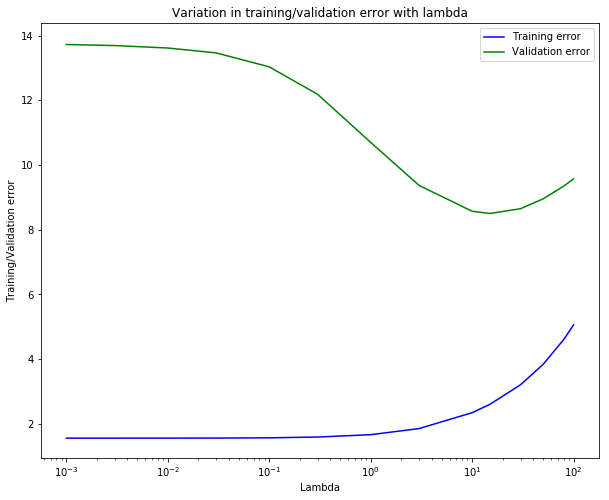

In [19]:
# now implement the validation_curve function in utils.py
# this function helps in determining the best lambda using a
# a validation set
# The code will now run your function and plot the figure 

reg_vec, error_train, error_val = utils.validation_curve(XX_poly,y_train,XX_poly_val,y_val)
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.show()

### Test set error with quadratic features with the best  $\lambda$  chosen with the validation set


In [20]:
# TODO: your code for computing test error on the best model (model with the best lambda)
reg_opt = 10

reglinear_reg3 = RegularizedLinearReg_SquaredLoss()
theta_opt3 = reglinear_reg3.train(XX_poly,y_train,reg=reg_opt,num_iters=10000)
error_test = reglinear_reg3.loss(theta_opt3, XX_poly_test, y_test, reg_opt)
print 'The test error is:', error_test

Optimization terminated successfully.
         Current function value: 3.567673
         Iterations: 51
         Function evaluations: 59
         Gradient evaluations: 59
The test error is: 7.21802411669
